<a href="https://colab.research.google.com/github/Tharun1823/onlineretail/blob/main/cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Cars dataset.csv to Cars dataset.csv


# **Importing**  **libraries**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [3]:
cars = pd.read_csv('Cars dataset.csv')

In [4]:
cars.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [5]:
cars.tail()

,brand,km_driven,fuel,owner,selling_price
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000
8127,Tata,25000,Diesel,First Owner,290000


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


In [7]:
cars.dtypes

,0
brand,object
km_driven,int64
fuel,object
owner,object
selling_price,int64


# **Data** **cleaning**

In [8]:
cars.isnull().sum()

,0
brand,0
km_driven,0
fuel,0
owner,0
selling_price,0


In [9]:
cars.duplicated().sum()

1678

# **Univariate Analysis**

In [10]:
print("Cars :",cars.shape)

Cars : (8128, 5)


Price Statics:
count    8.128000e+03
mean     6.382718e+05
std      8.062534e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.000000e+07
Name: selling_price, dtype: float64


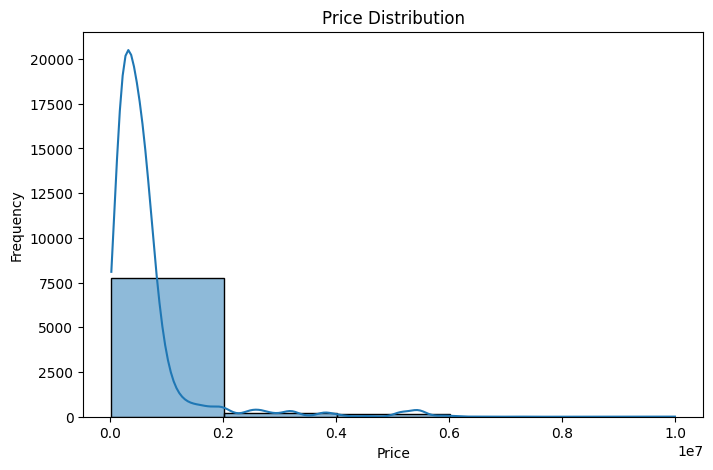

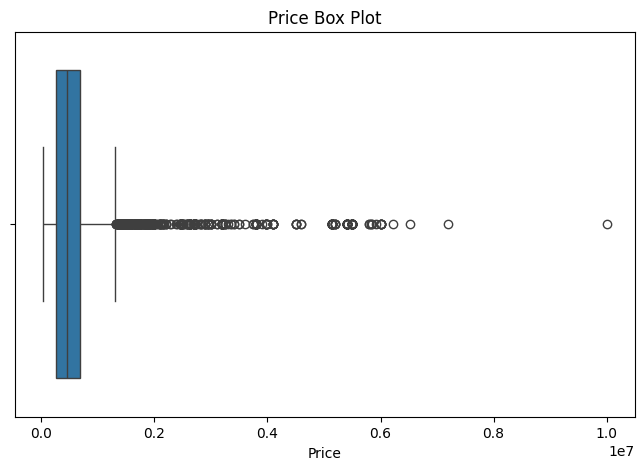

<ipython-input-13-8744f74b95e6>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cars['selling_price'], shade=True, color="blue")


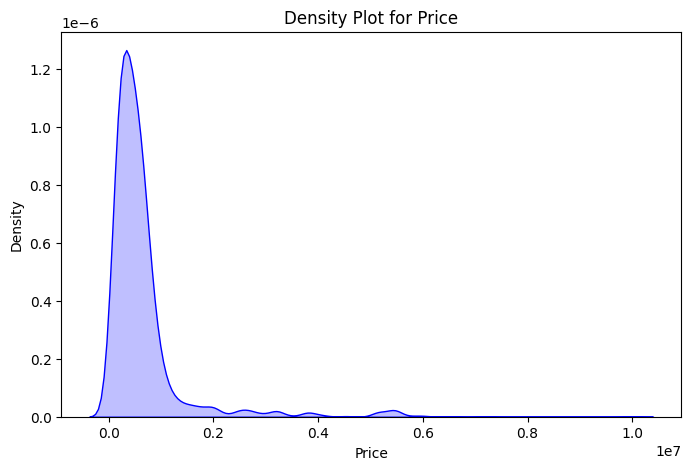

In [13]:
#Descriptive stastics
print("Price Statics:")
print(cars['selling_price'].describe())

#Histogram for price
plt.figure(figsize=(8, 5))
sns.histplot(cars['selling_price'], bins=5, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box Plot for Price
plt.figure(figsize=(8, 5))
sns.boxplot(x=cars['selling_price'])
plt.title('Price Box Plot')
plt.xlabel('Price')
plt.show()

# Density plot for Price
plt.figure(figsize=(8, 5))
sns.kdeplot(cars['selling_price'], shade=True, color="blue")
plt.title('Density Plot for Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


km_driven Statics:
count    8.128000e+03
mean     6.981951e+04
std      5.655055e+04
min      1.000000e+00
25%      3.500000e+04
50%      6.000000e+04
75%      9.800000e+04
max      2.360457e+06
Name: km_driven, dtype: float64


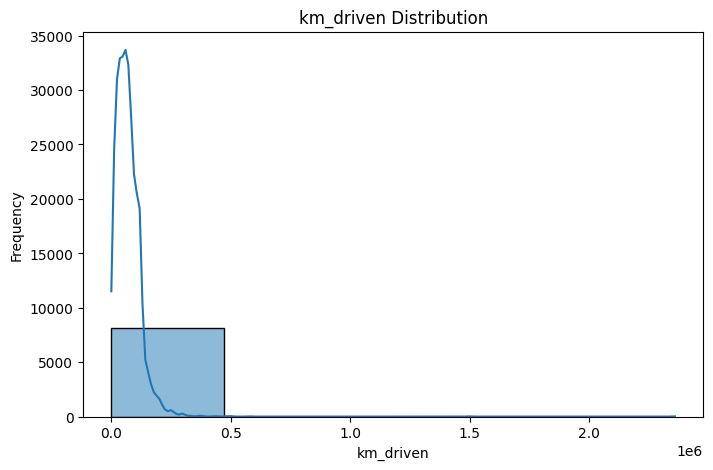

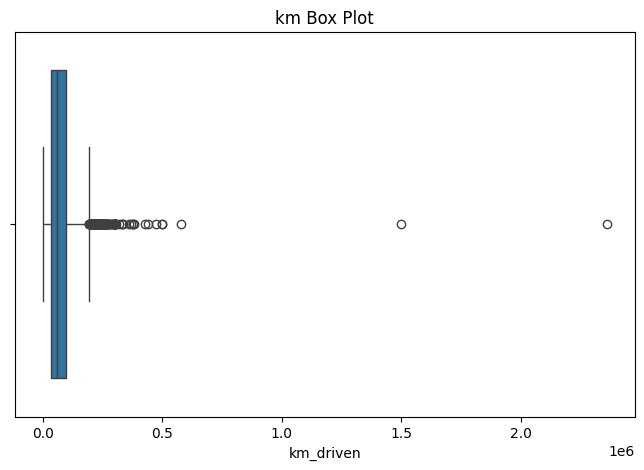

<ipython-input-14-e019d0c8f6a0>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cars['km_driven'], shade=True, color="green")


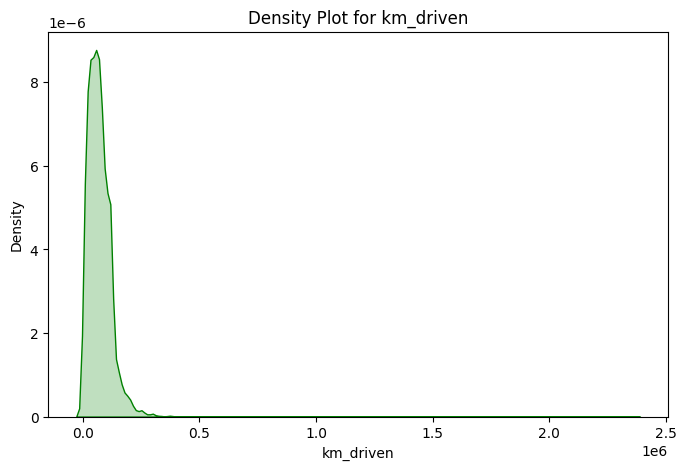

In [14]:
# km_driven statics
print("km_driven Statics:")
print(cars['km_driven'].describe())

# Histogram for km_driven
plt.figure(figsize=(8, 5))
sns.histplot(cars['km_driven'], bins=5, kde=True)
plt.title('km_driven Distribution')
plt.xlabel('km_driven')
plt.ylabel('Frequency')
plt.show()

# Box Plot for km_driven
plt.figure(figsize=(8, 5))
sns.boxplot(x=cars['km_driven'])
plt.title('km Box Plot')
plt.xlabel('km_driven')
plt.show()

# Density plot for Price
plt.figure(figsize=(8, 5))
sns.kdeplot(cars['km_driven'], shade=True, color="green")
plt.title('Density Plot for km_driven')
plt.xlabel('km_driven')
plt.ylabel('Density')
plt.show()


# **Bivariate Analysis:**

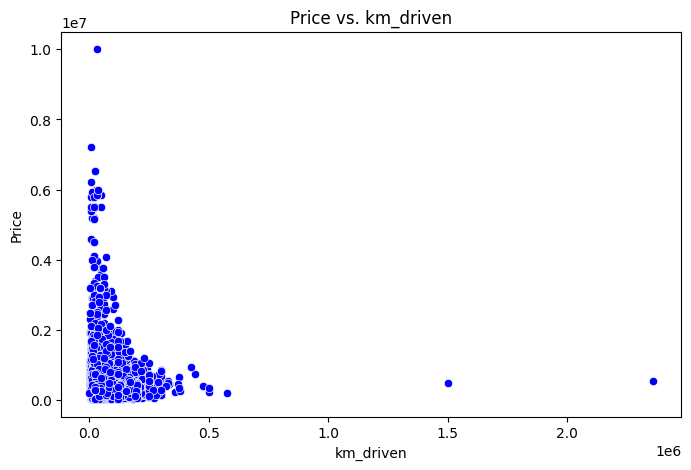

In [15]:
#Scatter plot between price vs km_driven
plt.figure(figsize=(8, 5))
sns.scatterplot(data=cars, x='km_driven', y='selling_price', color="blue")
plt.title('Price vs. km_driven')
plt.xlabel('km_driven')
plt.ylabel('Price')
plt.show()

# **Visualization:**

<ipython-input-16-78649397a5df>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='brand', data=cars, palette='viridis')


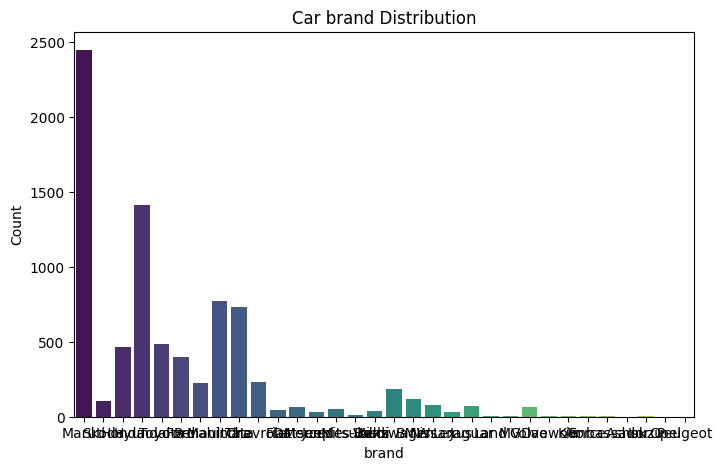

In [16]:
# Bar Chart for car brand
plt.figure(figsize=(8, 5))
sns.countplot(x='brand', data=cars, palette='viridis')
plt.title('Car brand Distribution')
plt.xlabel('brand')
plt.ylabel('Count')
plt.show()


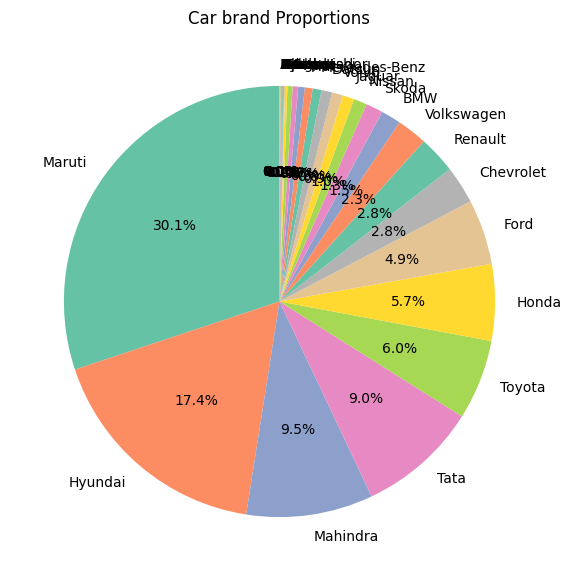

In [17]:
# Pie chart for car brand distribution
make_counts = cars['brand'].value_counts()
plt.figure(figsize=(7, 7))
make_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', n_colors=len(make_counts)))
plt.title('Car brand Proportions')
plt.ylabel('')  # Hide y-label
plt.show()


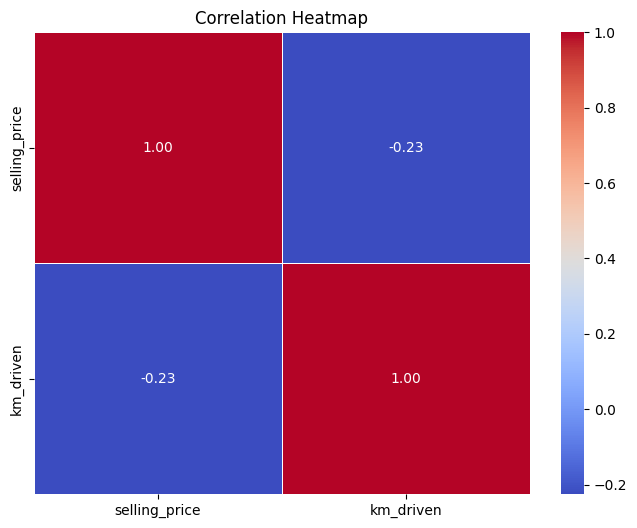

In [18]:
# Correlation Heatmap
correlation_matrix = cars[['selling_price','km_driven']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-19-467eb6848576>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='selling_price', data=cars, palette='muted')


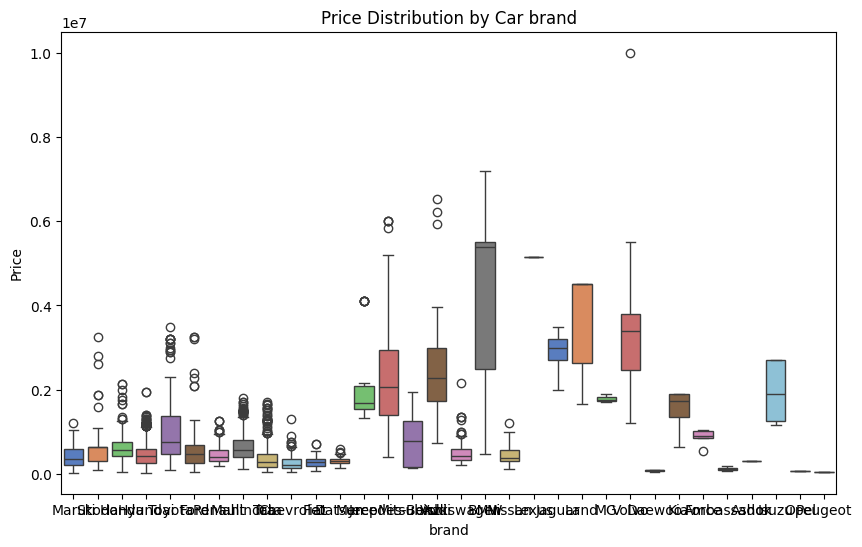

In [19]:
# Box Plot for Price by Make
plt.figure(figsize=(10, 6))
sns.boxplot(x='brand', y='selling_price', data=cars, palette='muted')
plt.title('Price Distribution by Car brand')
plt.xlabel('brand')
plt.ylabel('Price')
plt.show()
